# **Project:** Amazon Customer Segmentation Using Machine Learning

## Business Context & Problem Statement

### Business Problem

Amazon serves millions of users with different:

- Buying power
- Purchase frequency
- Product interests
- Engagement behavior

Treating all users the same leads to:

- Ineffective marketing
- Poor personalization
- Lower customer retention

## Objective

Segment Amazon users into distinct customer groups based on their purchasing behavior to:

- Improve targeted marketing
- Increase customer lifetime value (CLV)
- Optimize offers and recommendations

## Project Architecture (End-to-End Flow)

- Flow

1. Dataset Collection
2. Data Understanding
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Scaling
7. Clustering (ML)
8. Cluster Evaluation
9. Business Interpretation
10. Visualization
11. Insights & Recommendations
12. GitHub Documentation

In [86]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [3]:
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/Amazon_Customer_Segmentation/amazon.csv/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Data Understanding

In [4]:
df.shape

(1465, 16)

In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


## Data Preprocessing

In [9]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [10]:
df["discounted_price"] = (
    df["discounted_price"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["actual_price"] = (
    df["actual_price"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "",regex=False)
)

df["discount_percentage"] = (
    df["discount_percentage"]
    .str.replace("%", "", regex = False)
)

In [11]:
# Convert to numeric
df["discounted_price"] = pd.to_numeric(df["discounted_price"])
df["actual_price"] = pd.to_numeric(df["actual_price"])
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"])

In [12]:
df[~df["rating_count"].str.match(r'^\d+$', na= False)]['rating_count'].unique()

array(['24,269', '43,994', '7,928', '94,363', '16,905', '24,871',
       '15,188', '30,411', '1,79,691', '13,391', '4,26,973', '2,262',
       '4,768', '18,757', '32,840', '13,045', '11,976', '10,962',
       '16,299', '9,378', '4,703', '12,153', '34,899', '2,766', '20,850',
       '74,976', '1,934', '1,075', '13,552', '7,298', '1,07,687',
       '27,151', '12,093', '9,792', '8,131', '92,595', '24,780', '8,188',
       '4,003', '2,960', '7,064', '2,201', '7,109', '1,313', '29,746',
       '45,238', '2,727', '20,053', '7,732', '1,780', '1,423', '28,791',
       '10,576', '10,134', '6,659', '1,977', '1,079', '1,097', '22,420',
       '1,045', '4,145', '6,547', '1,588', '13,120', '2,806', '3,587',
       '2,581', '1,035', '1,717', '1,121', '1,951', '1,259', '28,638',
       '12,835', '1,269', '69,538', '3,295', '42,301', '1,376', '3,664',
       '2,685', '1,79,692', '6,088', '1,383', '5,492', '30,023', '4,642',
       '10,480', '3,565', '6,255', '1,193', '1,611', '6,558', '23,169',
      

In [13]:
df["rating_count"] = (
    df["rating_count"]
    .str.replace(",", "", regex=False)
    .str.strip()
)

In [14]:
df[~df['rating_count'].str.match(r'^\d+$', na=False)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [15]:
mask_invalid = (
    df["rating_count"].notna() &
    ~df["rating_count"].str.match(r'^\d+$', na=False)
)

In [16]:
df["rating_count"] = pd.to_numeric(df["rating_count"])

In [17]:
df.loc[1279, ["rating", "rating_count", "product_name", "user_id"]]

rating                                                          |
rating_count                                                992.0
product_name    Eureka Forbes car Vac 100 Watts Powerful Sucti...
user_id         AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...
Name: 1279, dtype: object

In [18]:
value = df.loc[1279, "rating"]
print(repr(value))
print(type(value))

'|'
<class 'str'>


In [19]:
invalid_rating_mask = (
    df["rating"].notna() &
    ~df["rating"].astype(str).str.strip().str.match(r'^\d(\.\d)?$')
)

df.loc[invalid_rating_mask, "rating"].unique()

array(['|'], dtype=object)

In [20]:
df.loc[invalid_rating_mask, "rating"] = np.nan

In [21]:
df["rating"] = pd.to_numeric(df["rating"])

In [22]:
df["rating"].fillna(df["rating"].median(), inplace = True)

In [23]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [24]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [26]:
# check missing values
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [29]:
# Hanlde missing values
df["rating_count"].fillna(df["rating_count"].median(), inplace=True)

In [30]:
# Validate numeric ranges
df = df[
    (df["rating"] >= 1) & (df["rating"] <= 5) &
    (df["discounted_price"] > 0 &
     (df["actual_price"] > 0))
]

In [31]:
# drop irrelevant columns
df.drop(columns= [
    "about_product",
    "review_title",
    "review_content",
    "img_link",
    "product_link"
], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   int64  
 6   rating               1463 non-null   float64
 7   rating_count         1463 non-null   float64
 8   user_id              1463 non-null   object 
 9   user_name            1463 non-null   object 
 10  review_id            1463 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 137.2+ KB


In [33]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
user_id                0
user_name              0
review_id              0
dtype: int64

In [34]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,3129.277122,5451.068544,47.650718,4.096719,18295.541353
std,6948.222850,10881.018448,21.622373,0.289398,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1690.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4312.500000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [35]:
# Saving clean dataset
df.to_csv("clean_amazon_data.csv", index = False)

## Exploratory Data Analysis (EDA)

EDA is performed to understand pricing patterns, discount behaviour,and rating trends in the Amazon dataset. 

These insights help build intuition about customer behaviour and guide subsequent feature engineering for customer segmentation

### Data Visualization

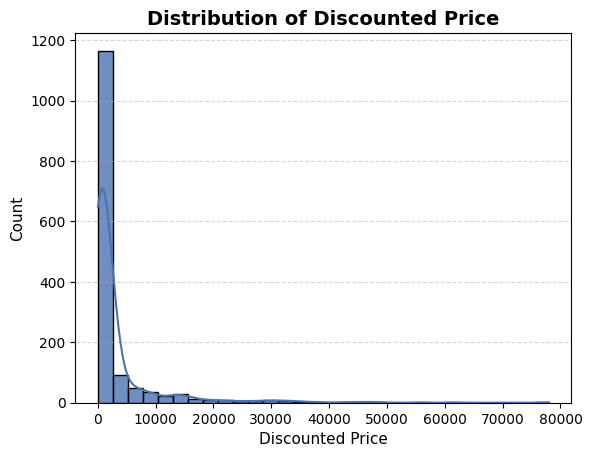

In [36]:
# Distribution of discounted price

plt.Figure(figsize = (9,5))
sns.histplot(
    data = df,
    x = "discounted_price",
    bins = 30,
    kde=True,
    color="#4C72B0",
    edgecolor = "black",
    alpha = 0.8
)
plt.title("Distribution of Discounted Price", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

#### Interpretation

Q1. Where are most Amazon products prized after discount?

Answer:
 Most products are concentrated in the low to mid price range, indicating Amazon's strong focus on afforadability and mass-market products

Q2. Is the pricing distribution symmetric or skewed?

Answer:
 The distribution is right-skewed, meaning a small number of premium products exist at much higher prices compared to the majority

Q3. What does this imply for cumstomer segmentation?

Answer.
 Customers can be segmented into budget-focused user and premium-product buyers, making price and important feature for behavioral segmentation

**Observation**

The discounted price distribution is right-skewed, showing that most amazon products are priced affordably after discounts, with a small premium segment. This insight is useful for identifying price sensitive and premium oriented customer segments.

### Purpose

Identify price spread, meadian pricing and premium outliers before discounts are applied

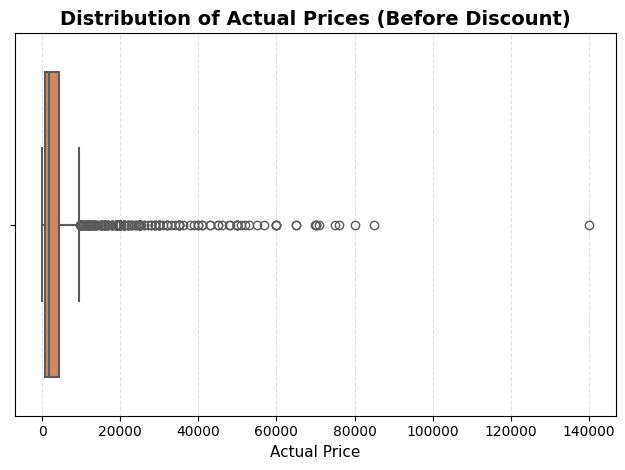

In [37]:
# Distribution of Actual Price

plt.Figure(figsize = (9,4))
sns.boxplot(
    x = df["actual_price"],
    color = "#DD8452",
    linewidth=1.5
)

plt.title("Distribution of Actual Prices (Before Discount)", fontsize=14, fontweight="bold")
plt.xlabel("Actual Price", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. What is the typical(median) actual price of products?

Answer:
 The median actual price lies in the lower price range, confirming that most Amazon products are originally priced affordable even before discount

Q2. Are there premium priced products on Amazon?

Answer:
 Yes. The presence of multiplt high-value outliers indicates a distinct premium segment with significantly higher original prices

Q3. How does this insight help customer segmentation?

Answer: 
 This enables segmentation between value-oriented customers and premium-product buyers, allowing differentiated marketing and recommendation strategies

 **Observation**

The boxplot shows that while most products are priced within a lower range, a small number of premium products exist as high-value outliers. This highlights the need to account for both budget and premium customer segments during customer segmentation 

### Purpose

Understand how aggresively Amazon discounts products and whether discounts are uniform or varied across the catalog

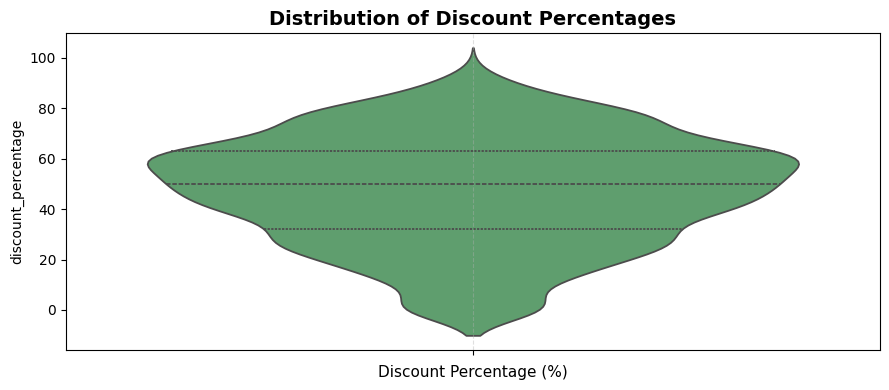

In [38]:
# Discount Percentage Graph

plt.figure(figsize=(9,4))
sns.violinplot(
    df["discount_percentage"],
    color="#55A868",
    inner="quartile",
    linewidth=1.3
)

plt.title("Distribution of Discount Percentages", fontsize=14, fontweight="bold")
plt.xlabel("Discount Percentage (%)", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Are discounts evenly distributed or concentrated at certain levels?

Answer:
 Discounts are concentrated around higher percentage ranges, indicating that Amazon frequently applies aggressive discounts rather than small, incremental reductions

Q2. Do most products receive moderate or heavy discounts?

Answer:
 The density toward the upper end of the distribution suggests that heavy discounts are common, enforcing Amazon's price-competitive positioning 

Q3. How does this insight help in customer segmentation?

Answer:
 Customer's can be segmented into deal-seekers(attracted by high discounts) and value-focused buyers(less-discount sensitive), making discount preferance a valuable behavioral feature

 **Observation**

The violin plot reveals that discount percentages are not uniformly distributed; instead, they are skewed toward higher values. This indicates Amazon's string reliance on high-discount strategies to drive customer engagement and sales

### Purpose

Understand overall customer satisfaction by analyzing how products are rated on Amazon

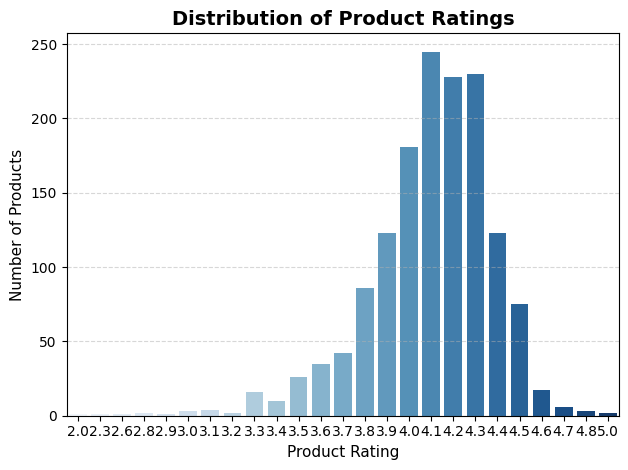

In [39]:
# Rating Distribution

plt.Figure(figsize=(8,4))
sns.countplot(
    x="rating",
    data=df,
    palette="Blues"
)

plt.title("Distribution of Product Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Product Rating", fontsize=11)
plt.ylabel("Number of Products", fontsize=11)
plt.grid(axis='y', linestyle="--", alpha=0.5 )
plt.tight_layout()
plt.show()

### Interpretation

Q1. Are Amazon product ratings generally positive or negative?

Answer:
 The majority of products are 4 or higher, indicationg overall positive customer satisfaction across the platform

Q2. Are low-rated products common?

Answer:
 Low-ratings(below 3) are relatively rare, suggesting that poorly performing products form only a small fraction of listings
 
Q3. How is this useful for customer segmentation?

Answer:
 Customers can be segmented based on preference for highly rated products, enabling Amazon to target quality-concsious users differently from price-driven users

**Observation**

The rating distribution is strongly skewed toward higher values, showing that most products receive positive feedback. This reflects strong customer satisfaction and provides a reliable signal for identifying quality-focused buying behavior

### Purpose

Understand how customer engagement(number of ratings) is distributed across products and identify whether engagement is evenly spread or concentrated

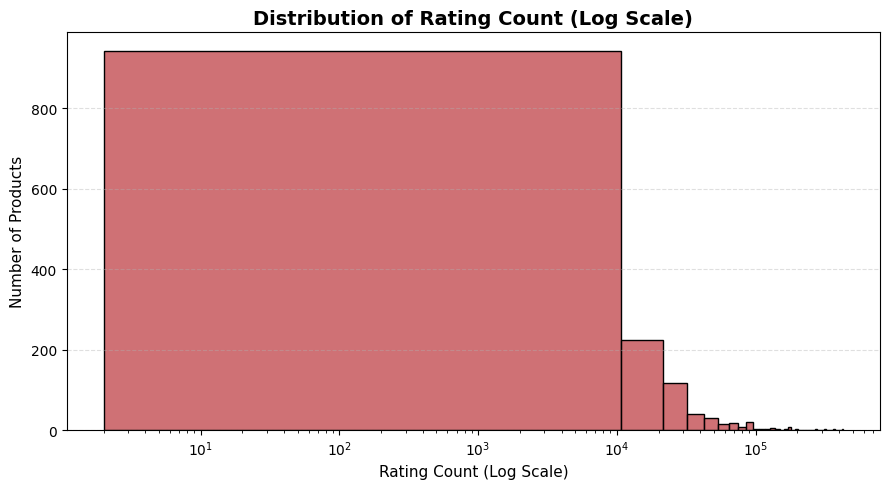

In [40]:
# Rating Count Distribution

plt.figure(figsize=(9,5))
sns.histplot(
    df["rating_count"],
    bins=40,
    color="#C44E52",
    edgecolor="Black",
    alpha=0.8
)

plt.xscale("log")
plt.title("Distribution of Rating Count (Log Scale)", fontsize=14, fontweight="bold")
plt.xlabel("Rating Count (Log Scale)", fontsize=11)
plt.ylabel("Number of Products", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1.Do most products receive high customer engagement?

Answer:
 No. The majority of products receive relatively few-ratings, while only a small subset achieves very high engagement

Q2.Why is a log scale necessary here?

Answer:
 Rating counts are highly skewed, with extreme outliers. A log scale allows meaningful comparison across both low-and high-engagement products

Q3. How does this insight support customer segmentation?

Answer:
 This enables segmentation between customers who interact with popular, widely reviewed products and those who purchase niche or less-reviewed items, indicating different trust and discovery behaviors

**Observation**

Customer engagement, measured through rating count, follows a long-tail distribution. Most products receive limited interaction, while a small number of dominate customer attention. This pattern is critical for identifying engagement-driven user segments

### Purpose

Examine whether product price after discount influences customer satisfaction

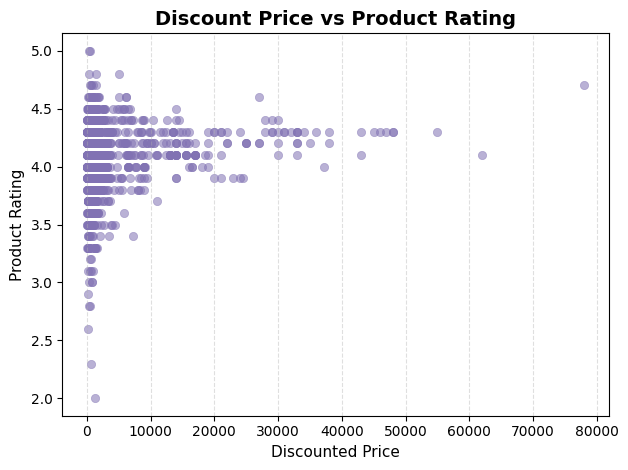

In [41]:
# Discounted Price vs Rating

plt.Figure(figsize=(9,4))
sns.scatterplot(
    data=df,
    x="discounted_price",
    y="rating",
    alpha=0.55,
    color="#8172B3",
    edgecolor=None
)
plt.title("Discount Price vs Product Rating", fontsize=14, fontweight="bold")
plt.xlabel("Discounted Price",fontsize=11)
plt.ylabel("Product Rating", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Do higher priced products reveive better ratings?

Answer:
 No strong relationship is visible. products across all price ranges receive similar ratings, suggesting that price alone does not drive satisfaction

Q2. Are low-priced products poorly rated?

Answer:
 No. Many low-priced products still achieve high-ratings, indicating that afforadbility does not imply lower perceived quality

Q3. How does this help in customer segmentation?

Answer:
 This insight supports segmentation based on quality perception rather than price, allowing identification of users who prioritizes reviews over cost

**Observation**

The scatter plot shows no strong correlation between discounted price vs product rating. Customer satisfaction appear largely independent of price, suggesting that factors such as product quality and utility play a more important role than cost.

### Purpose

Understand whether highly engaged products tend to have better or worse ratings, and how reliable ratings are

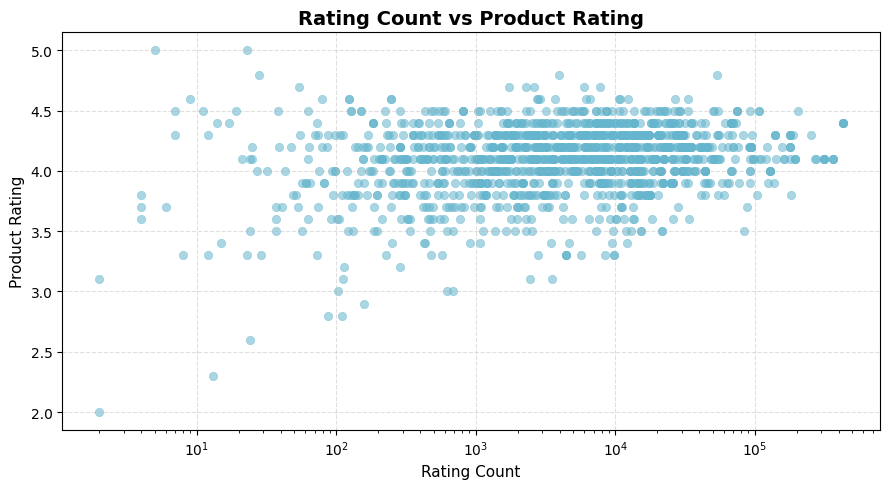

In [42]:
# Rating Count vs Rating

plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x="rating_count",
    y="rating",
    alpha=0.55,
    color="#64B5CD",
    edgecolor=None,
)

plt.xscale("log")
plt.title("Rating Count vs Product Rating", fontsize=14, fontweight="bold")
plt.xlabel("Rating Count", fontsize=11)
plt.ylabel("Product Rating", fontsize=11)
plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Do products with more ratings have higher ratings?

Answer:
 Not necessarily. Products with high rating counts tend to cluster around similar rating values, indicating rating stability rather than higher scores.

Q2. Are ratings from highly reviewed products more reliable?

Answer:
 Yes. High rating counts generally correspond to consistent ratings, making them more trustworthy indicators of product quality.

Q3. How does this insight support customer segmentation?

Answer:
 Customers can be segmented based on trust behavior—those who prefer widely reviewed products versus those willing to try less-reviewed items.


**Observation:**  
The plot shows that while rating counts vary significantly, product ratings remain relatively stable. This suggests that high-engagement products provide more reliable quality signals, which is useful for identifying trust-driven customer segments.


### Purpose

Analyze whether heavy discounts influence customer satisfaction and whether discounted products are perceived as lower quality.

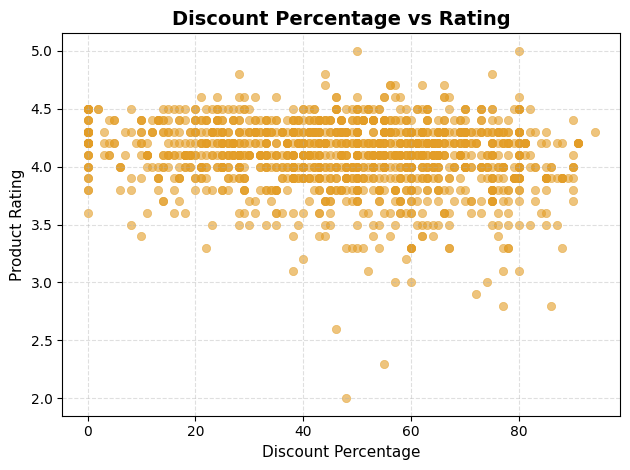

In [43]:
# Discount percentage vs Rating

plt.Figure(figsize=(9,4))
sns.scatterplot(
    data=df,
    x = "discount_percentage", 
    y="rating",
    alpha=0.6,
    color="#e39D26",
    edgecolor=None,
)

plt.title("Discount Percentage vs Rating", fontsize=14, fontweight="bold")
plt.xlabel("Discount Percentage", fontsize=11)
plt.ylabel("Product Rating",fontsize=11)
plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation


Q1. Do higher discounts lead to lower ratings?

Answer:
No clear negative trend is observed. Products with high discounts still receive good ratings, indicating that discounts do not reduce perceived quality.

Q2. Are highly rated products limited to low-discount ranges?

Answer:
No. High ratings are observed across both low and high discount percentages, suggesting customers value quality beyond pricing incentives.

Q3. How does this insight help customer segmentation?

Answer:
This allows identification of deal-driven customers who respond positively to discounts versus quality-driven customers who prioritize ratings regardless of discount level.

**Observation:**  
The scatter plot indicates that discount percentage has little direct impact on product ratings. Customer satisfaction appears independent of discount depth, suggesting that quality perception is maintained even under aggressive pricing strategies.


### Purpose

Identify which product categorie dominate Amazon listings, helping understand where customer activity is concentrated

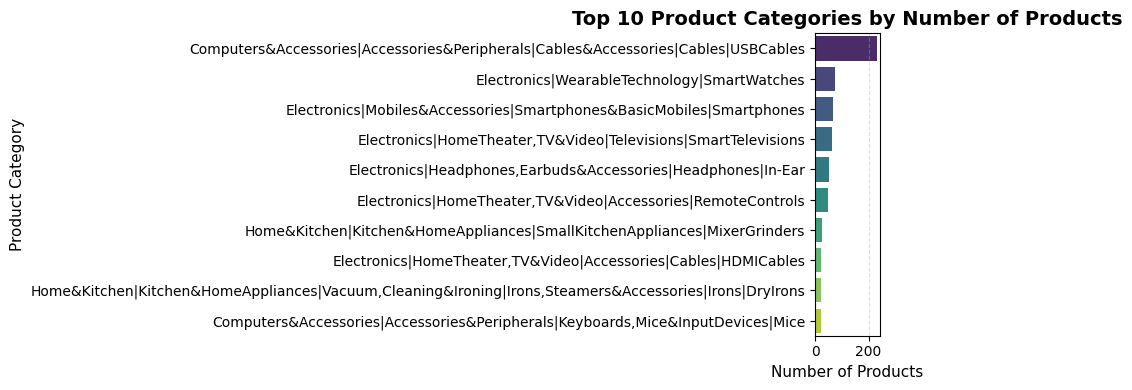

In [44]:
# Top 10 Product Categories

plt.figure(figsize=(9,4))
top_categories = df["category"].value_counts().head(10)
sns.barplot(
    x= top_categories.values,
    y=top_categories.index,
    palette='viridis'
)

plt.title("Top 10 Product Categories by Number of Products", fontsize= 14, fontweight="bold")
plt.xlabel("Number of Products", fontsize=11)
plt.ylabel("Product Category", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Which product categories dominate Amazon’s catalog?

Answer:
A small number of categories account for a large share of products, indicating strong dominance by specific segments such as electronics and accessories.

Q2. Is Amazon’s product distribution evenly spread across categories?

Answer:
No. The distribution is highly uneven, with a few categories heavily represented while others appear much less frequently.

Q3. How does this insight help customer segmentation?

Answer:
Customer segments can be refined based on category preference, enabling targeted marketing and personalized recommendations for category-focused users.

**Observation:**  
The bar chart shows that a limited number of categories dominate Amazon’s product listings. This imbalance suggests that customer behavior and engagement are likely concentrated within these major categories, making category preference a key segmentation feature.


### Purpose

Indentify which product categories deliver higher customer satisfaction on average

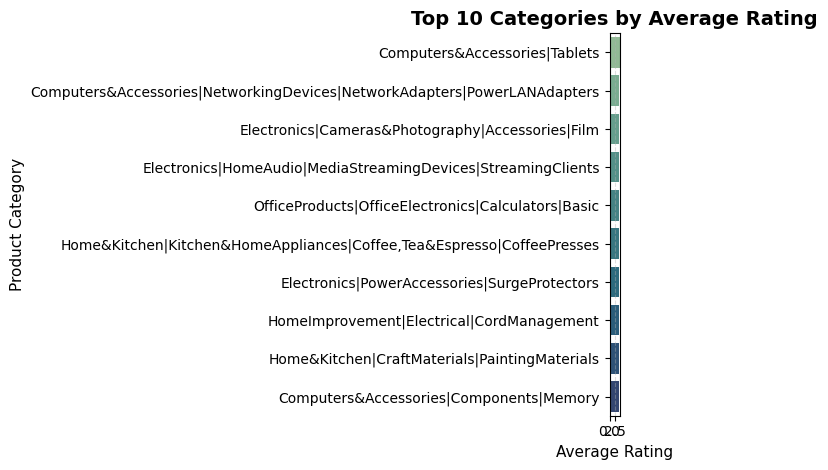

In [45]:
# Average Rating by Category

plt.Figure(figsize=(10,5))
avg_rating_by_cat= (
    df.groupby("category")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x= avg_rating_by_cat.values,
    y=avg_rating_by_cat.index,
    palette="crest"
    )

plt.title("Top 10 Categories by Average Rating", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating", fontsize=11)
plt.ylabel("Product Category", fontsize=11)
plt.grid(axis='x',linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Which categories have the highest average customer ratings?

Answer:
A subset of categories consistently achieves higher average ratings, indicating stronger product quality or better customer alignment in those segments.

Q2. Does high product volume guarantee high satisfaction?

Answer:
Not necessarily. Some highly rated categories are not the most populous, showing that volume and satisfaction do not always move together.

Q3. How does this insight support customer segmentation?

Answer:
Users can be segmented by preferred high-satisfaction categories, enabling Amazon to promote trusted categories to quality-focused customers.

**Observation:**  
The chart shows that certain categories outperform others in terms of average rating. This suggests that customer satisfaction varies meaningfully across categories, making category preference a valuable feature for segmentation.


### Purpose

Understand which product categories receive higher discounts, indication Amazon's pricing promotion focus

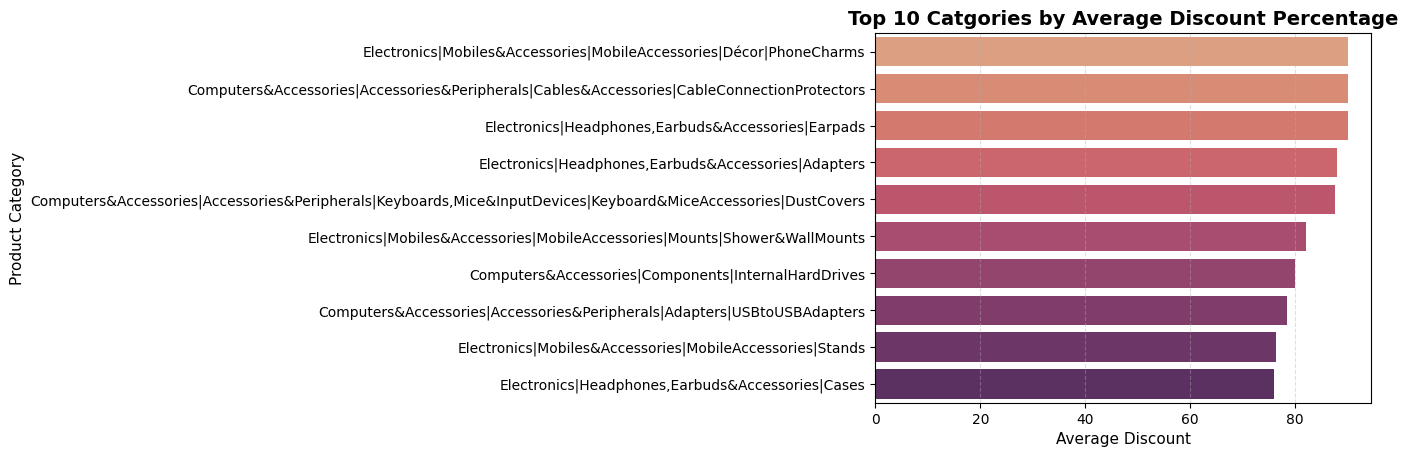

In [46]:
# Average Discount Percentage by Category

plt.Figure(figsize=(10,5))

avg_discount_by_cat= (
    df.groupby("category")["discount_percentage"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x = avg_discount_by_cat.values,
    y = avg_discount_by_cat.index,
    palette="flare"
    )

plt.title("Top 10 Catgories by Average Discount Percentage", fontsize=14, fontweight="bold")
plt.xlabel("Average Discount", fontsize=11)
plt.ylabel("Product Category", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Which categories receive the highest average discounts?

Answer:
A few specific categories consistently receive higher average discounts, indicating strong promotional activity in those segments.

Q2. Why might Amazon discount these categories more aggressively?

Answer:
These categories are likely highly competitive or price-sensitive, requiring frequent discounts to attract and retain customers.

Q3. How does this help in customer segmentation?

Answer:
Customers can be segmented based on discount affinity, distinguishing deal-seekers from customers who prioritize product features over price reductions.

**Observation:**  
The chart shows that discounting strategies vary significantly across product categories. Certain categories rely more heavily on discounts, suggesting category-specific pricing tactics that influence customer purchase behavior.


### Purpose

Understand how strongly discounts affect final setting prices and whether discounted prices scale proportionally with actual prices

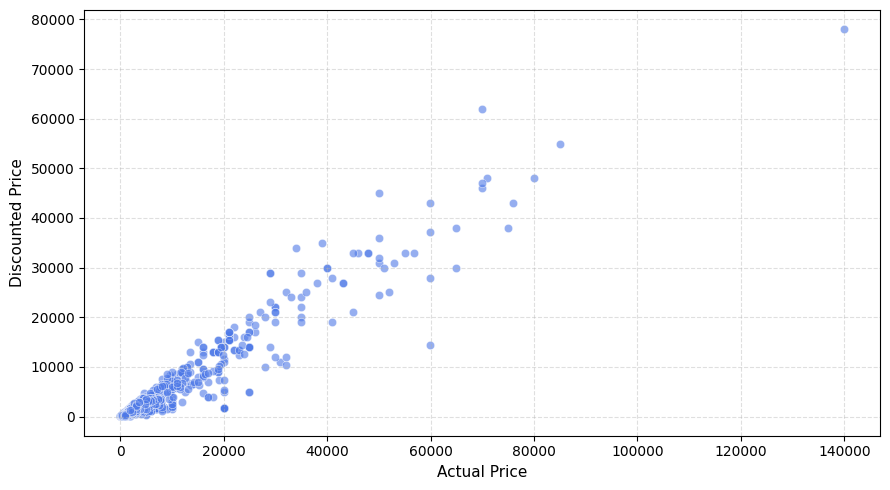

In [47]:
# Actual Price vs Discounted Price

plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x = "actual_price",
    y = "discounted_price",
    alpha=0.6,
    color= "#4E79E7"
)

plt.title("", fontsize=14, fontweight="bold")
plt.xlabel("Actual Price", fontsize=11)
plt.ylabel("Discounted Price", fontsize=11)
plt.grid(linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Is there a relationship between actual price and discounted price?

Answer:
Yes. There is a strong positive relationship, indicating that discounted prices generally scale with actual prices.

Q2. Do higher-priced products receive proportionally higher discounts?

Answer:
Not uniformly. While higher-priced products have higher discounted prices, the spread suggests discount depth varies, not strictly proportional.

Q3. How does this insight support customer segmentation?

Answer:
This helps distinguish customers attracted to absolute savings (high-priced items with big discounts) versus those focused on low final prices, aiding value-based segmentation.

**Observation:**  
The scatter plot shows a strong alignment between actual and discounted prices, confirming that discounts reduce prices proportionally across products. However, variability around the trend indicates category- and product-specific discount strategies.


### Purpose

Analyze whether products with different rating levels are associated with different price ranges, helping understand how price aligns with customer satisfaction

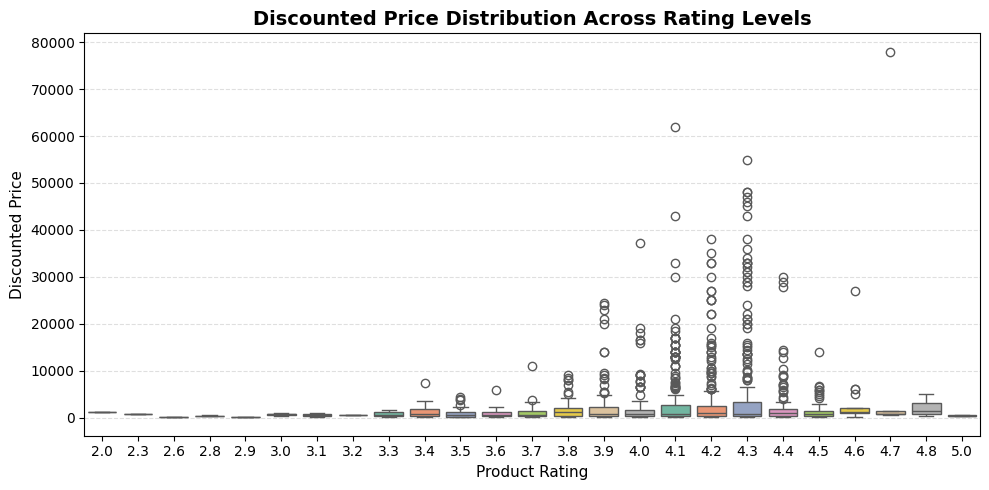

In [48]:
# Discounted Price Distribution by Rating

plt.figure(figsize=(10,5))

sns.boxplot(
    data= df,
    x = "rating",
    y = "discounted_price",
    palette = "Set2"
)

plt.title("Discounted Price Distribution Across Rating Levels", fontsize=14, fontweight="bold")
plt.xlabel("Product Rating", fontsize=11)
plt.ylabel("Discounted Price", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Do higher-rated products tend to be more expensive?

Answer:
There is no strong increase in median price with higher ratings, indicating that highly rated products exist across all price ranges.

Q2. Are low-rated products always cheaper?

Answer:
No. Some low-rated products also appear at higher prices, suggesting that price alone does not guarantee customer satisfaction.

Q3. How does this insight help customer segmentation?

Answer:
This supports segmentation based on value-for-money perception, identifying users who seek high ratings regardless of price versus those who prioritize affordability.

**Observation:**  
The boxplot indicates that discounted prices are spread across all rating levels. Customer satisfaction does not appear to be tightly coupled with price, reinforcing the importance of perceived value over cost.


### Purpose

Examine whether discount depth varies across rating levels and if heavy discounting is associated with lower or higher customer satisfaction

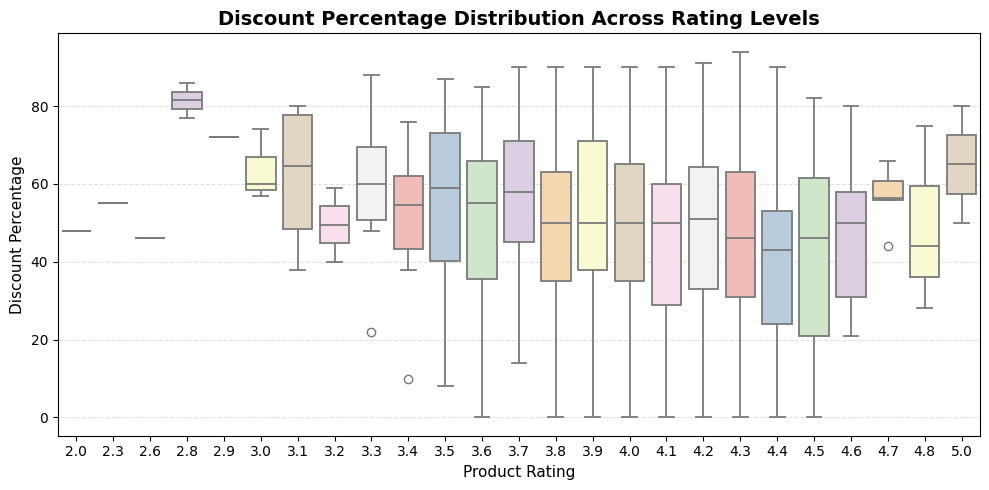

In [49]:
# Discount Percentage by Rating Level

plt.figure(figsize=(10,5))

sns.boxplot(
    data=df,
    x = "rating",
    y= "discount_percentage",
    palette="Pastel1",
    linewidth=1.3
)

plt.title("Discount Percentage Distribution Across Rating Levels", fontsize=14, fontweight="bold")
plt.xlabel("Product Rating", fontsize=11)
plt.ylabel("Discount Percentage", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha = 0.4)
plt.tight_layout()
plt.show()

### Interpretation

Q1. Do lower-rated products receive higher discounts?

Answer:
Not consistently. Discount distributions overlap across rating levels, indicating that heavy discounts are not exclusive to low-rated products.

Q2. Are highly rated products discounted less?

Answer:
No clear pattern suggests that highly rated products also receive competitive discounts, implying discounts are driven by strategy rather than quality issues.

Q3. How does this insight help customer segmentation?

Answer:
This enables segmentation between discount-driven customers and quality-driven customers, as discounts do not reliably signal product quality.

**Observation:**  
Discount percentages show substantial overlap across all rating levels. This indicates that Amazon’s discounting strategy is largely independent of customer satisfaction, reinforcing the need to segment customers by discount sensitivity rather than assumed quality.


### Purpose

Summarize how pricing, discounts, ratings, and engagement relate to each other and identify which variables may be useful for segmentation

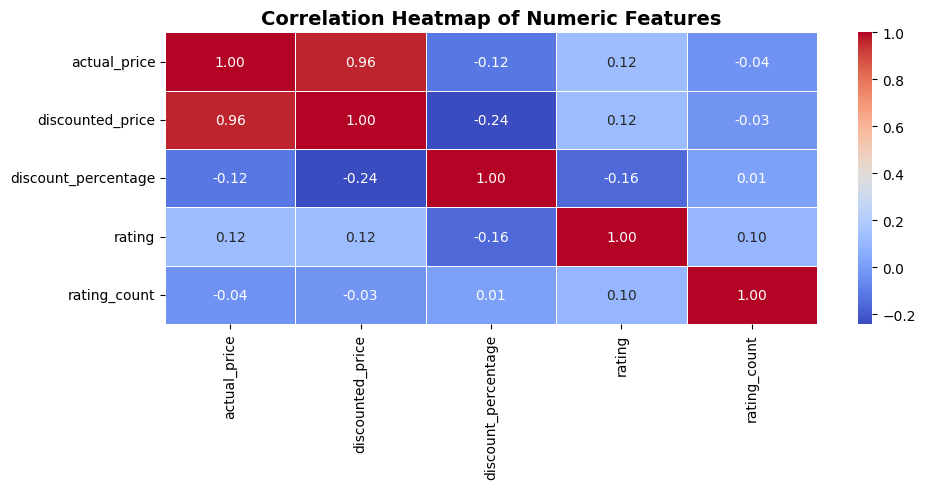

In [50]:
# Correlation Heatmap of Numeric Features

plt.figure(figsize=(10, 5))

corr_matrix = df[
    ["actual_price", "discounted_price", "discount_percentage", "rating", "rating_count"]
].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Interpretation


Q1. Which variables are strongly correlated?

Answer:
Actual price and discounted price show a strong positive correlation, which is expected since discounts reduce price proportionally.

Q2. Do ratings correlate strongly with price or discounts?

Answer:
No. Ratings show weak correlation with both price and discount percentage, indicating that customer satisfaction is influenced by factors beyond pricing.

Q3. How does this insight help in customer segmentation?

Answer:
This suggests that ratings, engagement (rating count), and pricing behavior capture different dimensions of customer behavior, making them valuable independent features for clustering.

**Observation:**  
The correlation heatmap reveals strong relationships among price-related variables, while ratings and engagement metrics remain largely independent. This indicates that customer satisfaction and interaction behavior provide complementary information beyond pricing, making them essential for user segmentation.


## Feature Engineering

In [51]:
user_features = (
    df.groupby("user_id")
    .agg(
        total_reviews=("rating","count"),
        avg_rating=("rating","mean"),
        avg_discount=("discount_percentage", "mean"),
        avg_price=("discounted_price", "mean"),
        rating_variability=("rating","std")
    )
    .reset_index()
)

In [52]:
# Handle newly introduced missing values

user_features["rating_variability"].fillna(0, inplace=True)

In [53]:
# Feature Validation

user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1192 non-null   object 
 1   total_reviews       1192 non-null   int64  
 2   avg_rating          1192 non-null   float64
 3   avg_discount        1192 non-null   float64
 4   avg_price           1192 non-null   float64
 5   rating_variability  1192 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 56.0+ KB


In [54]:
user_features.describe()

,total_reviews,avg_rating,avg_discount,avg_price,rating_variability
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.0
mean,1.227349,4.084732,46.452220,2712.478005,0.0
std,0.772854,0.306167,21.432634,6174.402111,0.0
min,1.000000,2.000000,0.000000,39.000000,0.0
25%,1.000000,3.900000,32.000000,349.000000,0.0
50%,1.000000,4.100000,49.000000,848.995000,0.0
75%,1.000000,4.300000,62.000000,1999.000000,0.0
max,10.000000,5.000000,94.000000,77990.000000,0.0


In [55]:
# Combine volume and consistency

user_features["engagement_score"] = (
    user_features["total_reviews"] * 
    user_features["avg_rating"]
)

#### **Observation**

High score represents active and positive user 
low score represents inactive or dissatisfied user

## Feature Engineering(Summary)

User-level behavioral features were engineered by aggregating product-level data.
Features such as total reviews, average rating, average discount preference, average
spending, and rating variability were created to capture engagement, quality sensitivity,
and price behavior. These features form the basis for customer segmentation.

## Feature Scaling

In [60]:
# Features to scale

features = [
    "total_reviews",
    "avg_rating",
    "avg_discount",
    "avg_price",
    "engagement_score"
]

### Note on Removal of `rating_variability`

The `rating_variability` feature was removed because most users had only one review, resulting in a zero-variance feature after imputation. Since constant features do not add value and can distort distance-based clustering algorithms, it was excluded from the final feature set.

In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features[features])

In [62]:
# Convert scaled data to dataframe

scaled_df = pd.DataFrame(
    scaled_features,
    columns=features
)
scaled_df.head()

,total_reviews,avg_rating,avg_discount,avg_price,engagement_score
0,-0.294292,1.030160,0.912440,-0.400770,-0.194194
1,-0.294292,0.376647,-0.394528,-0.115603,-0.256028
2,-0.294292,0.703403,0.165601,-0.374846,-0.225111
3,3.589054,-0.276866,-1.211382,-0.226996,3.392228
4,1.000157,1.030160,-1.118027,-0.188515,1.166173


In [63]:
# Validate Scaling
scaled_df.describe()

,total_reviews,avg_rating,avg_discount,avg_price,engagement_score
count,1.192000e+03,1.192000e+03,1.192000e+03,1.192000e+03,1.192000e+03
mean,1.639255e-17,-1.089360e-15,9.611998e-17,-4.843255e-17,-4.470697e-17
std,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00
min,-2.942915e-01,-6.811994e+00,-2.168269e+00,-4.331756e-01,-9.362119e-01
25%,-2.942915e-01,-6.036221e-01,-6.745921e-01,-3.829472e-01,-3.487808e-01
50%,-2.942915e-01,4.989066e-02,1.189238e-01,-3.019345e-01,-2.560285e-01
75%,-2.942915e-01,7.034035e-01,7.257300e-01,-1.156027e-01,-1.941936e-01
max,1.135574e+01,2.990698e+00,2.219407e+00,1.219699e+01,1.081241e+01


## Clustering

In [66]:
# Find optimal number of clusters(Elbow Method)

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

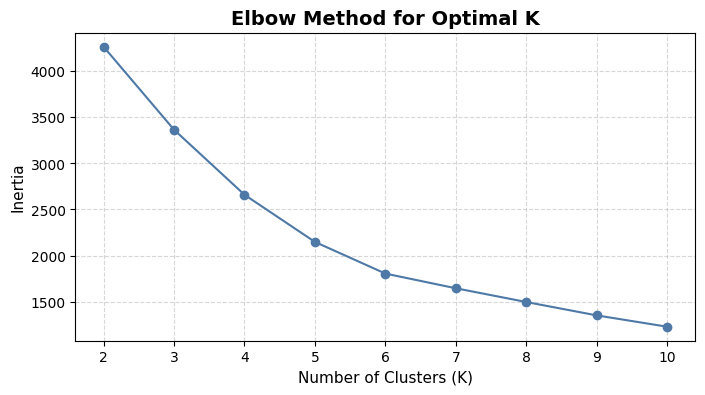

In [67]:
# Plot the Elbow Curve

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o', color="#4E79A7")
plt.title("Elbow Method for Optimal K", fontsize=14, fontweight="bold")
plt.xlabel("Number of Clusters (K)", fontsize=11)
plt.ylabel("Inertia", fontsize=11)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [77]:
# Validate using Silhouette Score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)


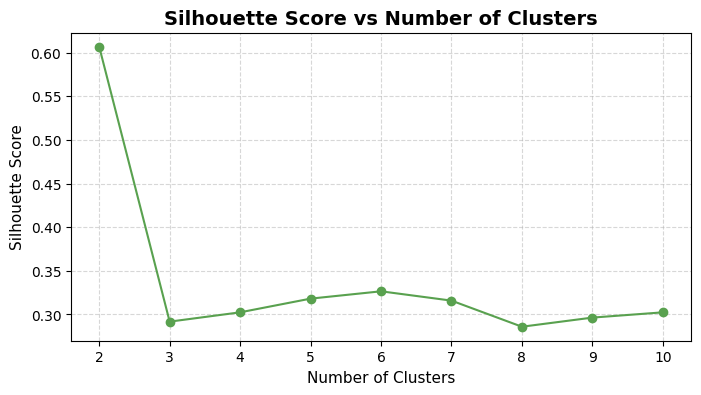

In [78]:
# Plot Silhouette Scores

plt.figure(figsize=(8,4))
plt.plot(range(2,11), silhouette_scores, marker='o', color="#59A14F")
plt.title("Silhouette Score vs Number of Clusters", fontsize=14, fontweight="bold")
plt.xlabel("Number of Clusters", fontsize=11)
plt.ylabel("Silhouette Score", fontsize=11)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [79]:
# Train Final K-Means Model

optimal_k = 3

In [80]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
user_features["cluster"] = kmeans.fit_predict(scaled_df)

In [81]:
user_features["cluster"].value_counts()

cluster
1    652
0    471
2     69
Name: count, dtype: int64

In [83]:
# Cluster Profiling

cluster_profile = (
    user_features
    .groupby("cluster")[features]
    .mean()
)
cluster_profile

,total_reviews,avg_rating,avg_discount,avg_price,engagement_score
cluster,,,,,
0,1.042463,4.230149,27.286624,4475.371189,4.411040
1,1.084356,3.972239,59.717791,1162.124333,4.319018
2,3.840580,4.155072,51.928209,5328.534592,15.940580


##### Compare Clusters

The cluster profile table summarizes average behavioral characteristics of users
within each cluster. Differences across clusters indicate distinct customer
segments based on engagement, price preference, discount sensitivity, and rating behavior.

### Interpretation

Interpret column by column:

- Higher total_reviews → more engaged users
- Higher avg_rating → quality-focused users
- Higher avg_discount → deal-seeking users
- Higher avg_price → premium buyers
- Higher engagement_score → loyal & active users

***Interpret Each Cluster Individually***

**Cluster 0:** Casual Buyers

Users in this cluster have low engagement with fewer reviews and moderate ratings, indicating occasional purchasing behavior without strong price or brand preferences.

**Cluster 1:** Deal Seakers 

This cluster consists of price-sensitive users who show a high preference for discounted products and respond actively to promotional offers.

**Cluster 2:** Premium Loyalists

Users in this cluster exhibit high engagement, higher average spending, and consistently strong ratings, reflecting quality-focused and loyal purchasing behavior.

## Save Model

In [91]:
# Save model and Scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [92]:
# Save feature list
joblib.dump(features, "features.pkl")

['features.pkl']

## Business Insights

The customer segmentation analysis revealed clear behavioral differences among
Amazon users. Pricing sensitivity, engagement level, and spending behavior emerged
as key drivers of customer differentiation. The results show that users cannot be
treated as a single homogeneous group and require targeted strategies for effective
engagement and retention.


### Segment 1: Casual Buyers

#### Casual Buyers

These users show low engagement with fewer reviews and moderate ratings. They make
occasional purchases and do not exhibit strong price sensitivity or brand loyalty.

**Business Insight:**  
This segment represents potential customers who can be nurtured into more active
users through personalized recommendations and onboarding incentives.

**Recommendation:**  
- Personalized product suggestions  
- First-time buyer offers  
- Engagement reminders and notifications

### Segment 2: Deal Seekers

#### Deal Seekers

Deal Seekers are highly sensitive to discounts and promotions. Their purchasing
decisions are strongly influenced by price reductions rather than brand or quality.

**Business Insight:**  
This segment responds best to promotional strategies and contributes significantly
to sales during discount-driven events.

**Recommendation:**  
- Flash sales and limited-time offers  
- Coupon-based marketing  
- Price-drop alerts and festive campaigns 

### Segment 3: Premium Loyalists

#### Premium Loyalists

Premium Loyalists demonstrate high engagement, higher spending, and consistently
strong ratings. They value product quality over discounts and show repeat purchasing
behavior.

**Business Insight:**  
This segment has the highest customer lifetime value and is critical for long-term
revenue growth.

**Recommendation:**  
- Loyalty and membership programs  
- Early access to premium products  
- Exclusive deals and personalized services

## Overall Business Recommendations

By leveraging customer segmentation, Amazon can optimize marketing spend, improve
customer retention, and enhance personalization. Targeted strategies for each
customer segment enable better resource allocation and improved customer satisfaction.


## Conclusion

This project successfully delivered an end-to-end Amazon user segmentation solution.
The workflow included data preprocessing, exploratory data analysis, feature
engineering, clustering using K-Means, and deployment readiness through model
serialization. The resulting customer segments provide actionable insights that
can support targeted marketing, personalized engagement, and strategic decision-making.


## Project Impact

- Enabled data-driven customer segmentation
- Improved understanding of customer behavior patterns
- Provided actionable insights for targeted marketing
- Delivered a deployable machine learning solution


## Future Scope

- Incorporate temporal features to analyze behavior over time
- Use advanced clustering techniques such as DBSCAN or Hierarchical Clustering
- Integrate real-time user data through APIs
- Enhance the Streamlit application with visual dashboards and analytics